In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_recall_curve) 
from sklearn.datasets import make_classification

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pm.__version__

'4.3.0'

In [3]:
from bartpy.sklearnmodel import SklearnModel

We simulate a data set with 500 samples and 10 features. Out of these 10 features, 6 features are informative, and the other 4 features are random linear combinations of the 6 informative features.

In [4]:
features, output = make_classification(n_samples = 500, n_features = 10, n_informative = 6, n_redundant = 4, n_classes = 2, random_state = 2022)
X = pd.DataFrame(features, columns=["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "feature_9", "feature_10"])
y = output

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Bayesian logistic regression

In the Bayesian logistic regression model, we specify the prior distribution of the coefficients manually.

In [6]:
with pm.Model() as logistic_model:
        
    beta_0=pm.Normal('beta_0', 0, 4)
    beta_1=pm.Normal('beta_1', 0, 4)
    beta_2=pm.Normal('beta_2', 0, 4)
    beta_3=pm.Normal('beta_3', 0, 4)
    beta_4=pm.Normal('beta_4', 0, 4)
    beta_5=pm.Normal('beta_5', 0, 4)
    beta_6=pm.Normal('beta_6', 0, 4)
    beta_7=pm.Normal('beta_7', 0, 4)
    beta_8=pm.Normal('beta_8', 0, 4)
    beta_9=pm.Normal('beta_9', 0, 4)
    beta_10=pm.Normal('beta_10', 0, 4)
    
    
    
    feature_1 = pm.Data("feature_1", value = X_train['feature_1'], mutable = True)
    feature_2 = pm.Data("feature_2", value = X_train['feature_2'], mutable = True)
    feature_3 = pm.Data("feature_3", value = X_train['feature_3'], mutable = True)
    feature_4 = pm.Data("feature_4", value = X_train['feature_4'], mutable = True)
    feature_5 = pm.Data("feature_5", value = X_train['feature_5'], mutable = True)
    feature_6 = pm.Data("feature_6", value = X_train['feature_6'], mutable = True)
    feature_7 = pm.Data("feature_7", value = X_train['feature_7'], mutable = True)
    feature_8 = pm.Data("feature_8", value = X_train['feature_8'], mutable = True)
    feature_9 = pm.Data("feature_9", value = X_train['feature_9'], mutable = True)
    feature_10 = pm.Data("feature_10", value = X_train['feature_10'], mutable = True)
    label = pm.Data("label", value = y_train, mutable = True)
    
    observed=pm.Bernoulli("binary_label", pm.math.sigmoid(beta_0 + beta_1 * feature_1 + beta_2 * feature_2 + beta_3 * feature_3 +
                                                      beta_4 * feature_4 + beta_5 * feature_5 + beta_6 * feature_6+ 
                                                      beta_7 * feature_7 + beta_8 * feature_8 + beta_9 * feature_9 + beta_10 * feature_10), observed = label)

In [7]:
with logistic_model:
    step = pm.Metropolis()
    trace = pm.sample(chains = 2, tune = 200, step = step)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_0]
>Metropolis: [beta_1]
>Metropolis: [beta_2]
>Metropolis: [beta_3]
>Metropolis: [beta_4]
>Metropolis: [beta_5]
>Metropolis: [beta_6]
>Metropolis: [beta_7]
>Metropolis: [beta_8]
>Metropolis: [beta_9]
>Metropolis: [beta_10]


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 583 seconds.


array([[<AxesSubplot:title={'center':'beta_0'}>,
        <AxesSubplot:title={'center':'beta_0'}>],
       [<AxesSubplot:title={'center':'beta_1'}>,
        <AxesSubplot:title={'center':'beta_1'}>],
       [<AxesSubplot:title={'center':'beta_2'}>,
        <AxesSubplot:title={'center':'beta_2'}>],
       [<AxesSubplot:title={'center':'beta_3'}>,
        <AxesSubplot:title={'center':'beta_3'}>],
       [<AxesSubplot:title={'center':'beta_4'}>,
        <AxesSubplot:title={'center':'beta_4'}>],
       [<AxesSubplot:title={'center':'beta_5'}>,
        <AxesSubplot:title={'center':'beta_5'}>],
       [<AxesSubplot:title={'center':'beta_6'}>,
        <AxesSubplot:title={'center':'beta_6'}>],
       [<AxesSubplot:title={'center':'beta_7'}>,
        <AxesSubplot:title={'center':'beta_7'}>],
       [<AxesSubplot:title={'center':'beta_8'}>,
        <AxesSubplot:title={'center':'beta_8'}>],
       [<AxesSubplot:title={'center':'beta_9'}>,
        <AxesSubplot:title={'center':'beta_9'}>],
       [<A

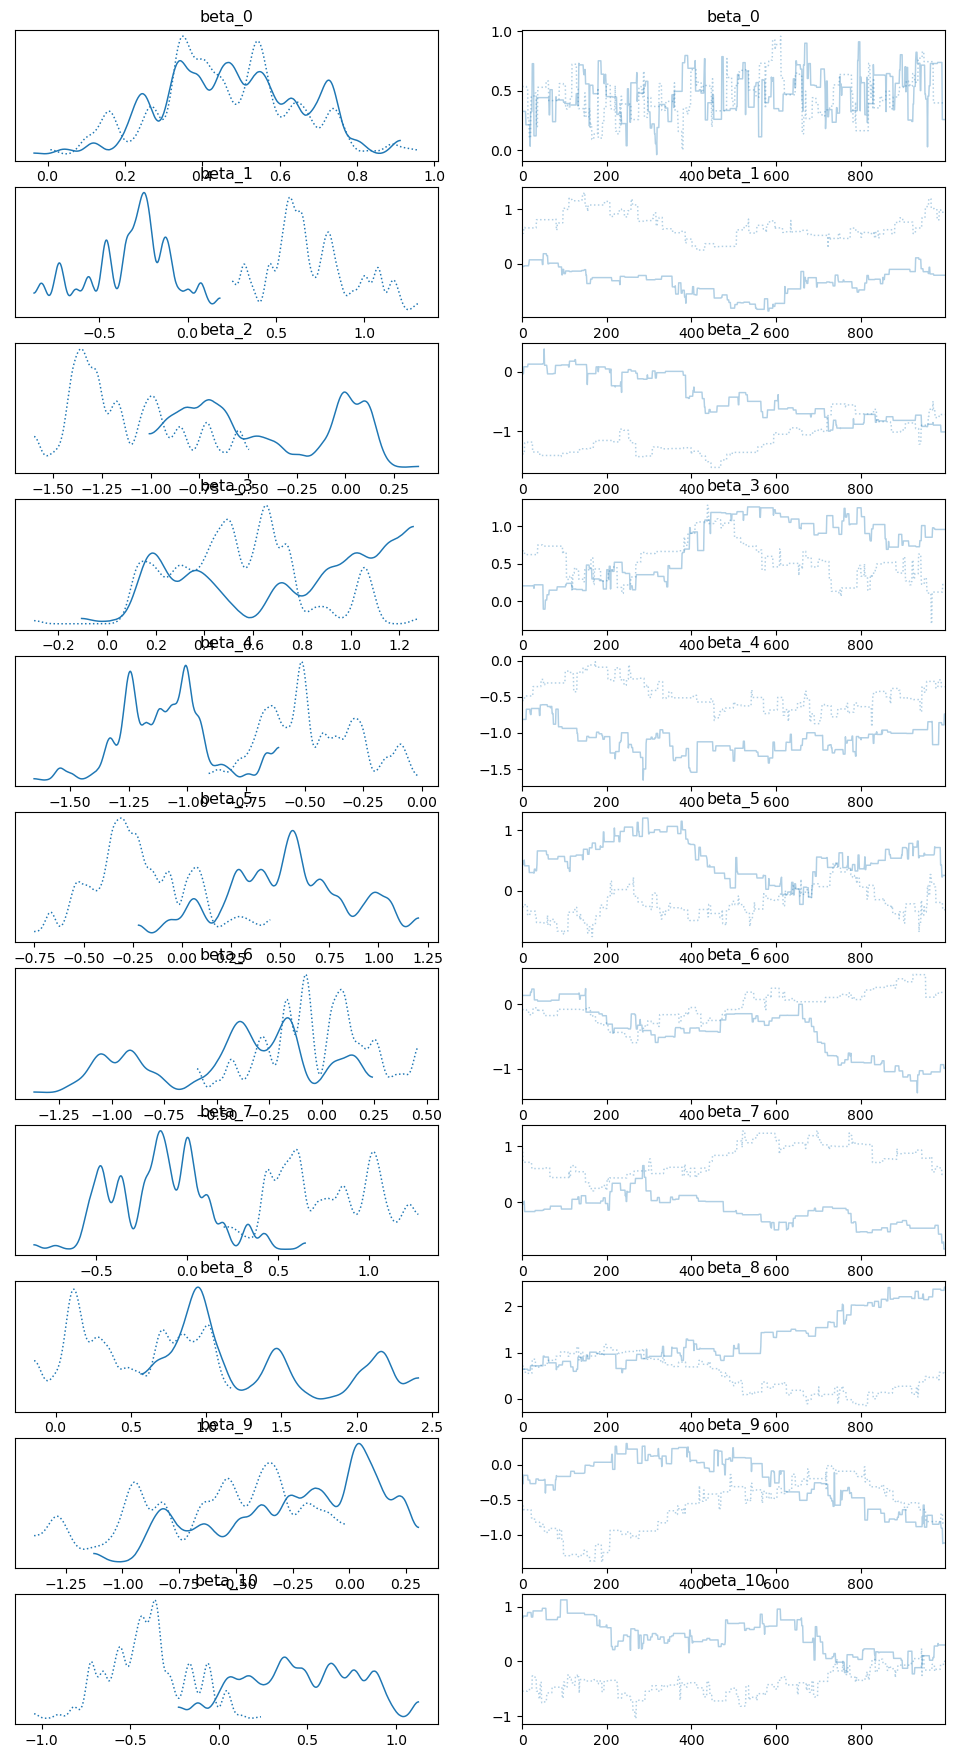

In [8]:
az.plot_trace(trace)

In [9]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,0.469,0.175,0.138,0.752,0.023,0.016,63.0,129.0,1.06
beta_1,0.184,0.567,-0.745,1.081,0.371,0.305,3.0,13.0,1.91
beta_2,-0.771,0.480,-1.410,0.123,0.313,0.257,3.0,14.0,2.26
beta_3,0.636,0.345,0.122,1.196,0.175,0.136,4.0,15.0,1.37
beta_4,-0.782,0.365,-1.347,-0.145,0.231,0.187,3.0,23.0,1.90
beta_5,0.167,0.463,-0.556,1.011,0.284,0.229,3.0,16.0,1.98
beta_6,-0.228,0.379,-1.093,0.261,0.211,0.165,3.0,11.0,1.68
beta_7,0.305,0.524,-0.546,1.111,0.354,0.294,2.0,9.0,2.73
beta_8,0.915,0.611,0.044,2.204,0.397,0.326,2.0,12.0,2.42
beta_9,-0.417,0.401,-1.092,0.270,0.227,0.179,3.0,19.0,1.75


In [10]:
with logistic_model:
    pm.set_data({'feature_1': X_test['feature_1']})
    pm.set_data({'feature_2': X_test['feature_2']})
    pm.set_data({'feature_3': X_test['feature_3']})
    pm.set_data({'feature_4': X_test['feature_4']})
    pm.set_data({'feature_5': X_test['feature_5']})
    pm.set_data({'feature_6': X_test['feature_6']})
    pm.set_data({'feature_7': X_test['feature_7']})
    pm.set_data({'feature_8': X_test['feature_8']})
    pm.set_data({'feature_9': X_test['feature_9']})
    pm.set_data({'feature_10': X_test['feature_10']})
    pm.set_data({'label': y_test})
    posterior_pred = pm.sample_posterior_predictive(trace)

Sampling: [binary_label]


In [11]:
y_score = posterior_pred['posterior_predictive']['binary_label'].mean(('chain', 'draw'))
y_pred_cat = np.where(y_score >= 0.5, 1, 0) 

In [12]:
print(roc_auc_score(y_pred_cat, y_test))
print(confusion_matrix(y_pred_cat, y_test))

0.775
[[45 15]
 [ 8 32]]


0.4355


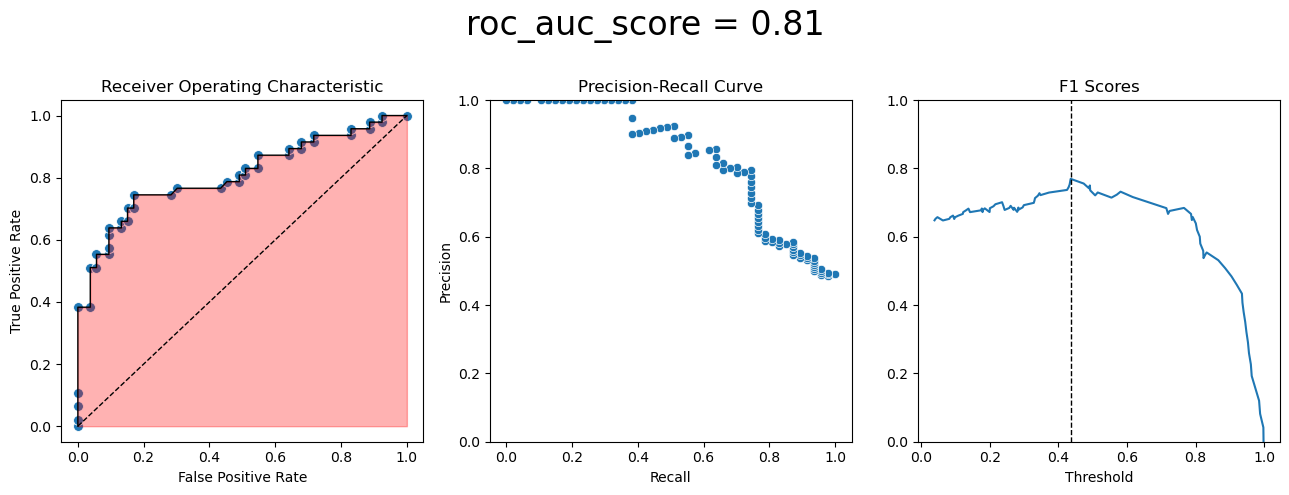

In [13]:
pred_scores = dict(y_true=y_test, y_score=y_score)
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

precision, recall, ts = precision_recall_curve(y_true=y_test, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()
print(best_threshold)

fig, axes = plt.subplots(ncols=3, figsize=(13, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, s=50, legend=False, ax=axes[0])
axes[0].plot('False Positive Rate', 'True Positive Rate', data=roc, lw=1, color='k')
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.3, color='red')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.60, y=.95, s=5)
    
fig.suptitle(f'roc_auc_score = {round(roc_auc_score(**pred_scores),2)}', fontsize=24)
fig.tight_layout()
fig.savefig("roc.png")
plt.subplots_adjust(top=.8)
plt.show()

# Bayesian additive regression tree

In the Bayesian additive regression tree model, we use the default parameters in the package bartpy. 

In [15]:
model = SklearnModel()
model.fit(X_train, y_train)

SklearnModel()

In [17]:
y_score = model.predict(X_test)

In [18]:
y_pred_cat = np.where(y_score >= 0.5, 1, 0) 

In [19]:
print(roc_auc_score(y_pred_cat, y_test))
print(confusion_matrix(y_pred_cat, y_test))

0.8297101449275363
[[45  9]
 [ 8 38]]


0.49192815175646193


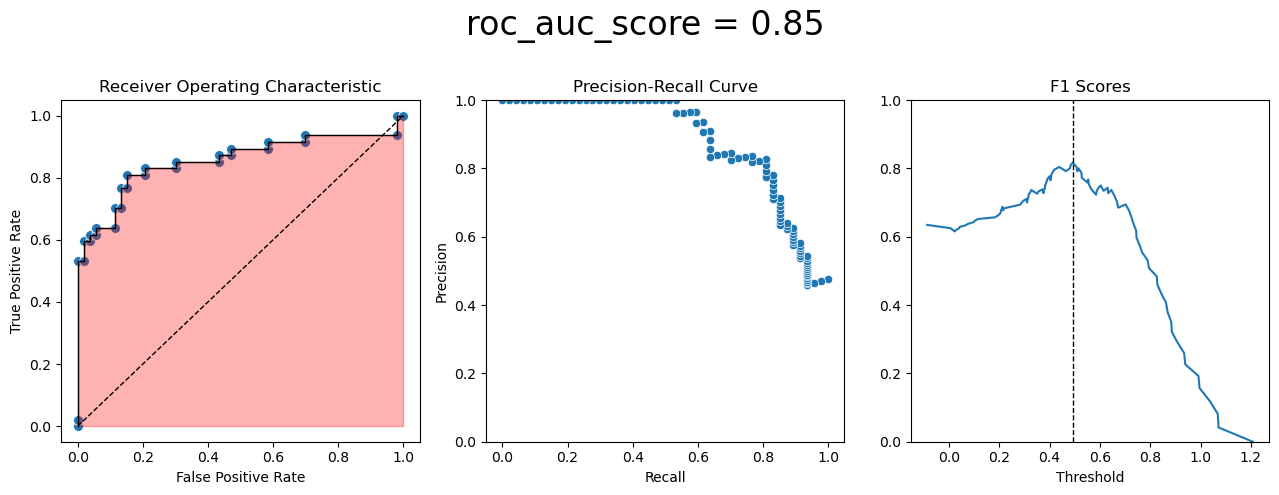

In [20]:
pred_scores = dict(y_true=y_test, y_score=y_score)
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

precision, recall, ts = precision_recall_curve(y_true=y_test, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()
print(best_threshold)

fig, axes = plt.subplots(ncols=3, figsize=(13, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, s=50, legend=False, ax=axes[0])
axes[0].plot('False Positive Rate', 'True Positive Rate', data=roc, lw=1, color='k')
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.3, color='red')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.60, y=.95, s=5)
    
fig.suptitle(f'roc_auc_score = {round(roc_auc_score(**pred_scores),2)}', fontsize=24)
fig.tight_layout()
fig.savefig("roc.png")
plt.subplots_adjust(top=.8)
plt.show()